In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

In [3]:
data = pd.read_csv("data.csv")


In [13]:
data = data.drop(columns=['id', 'Unnamed: 32'])


In [15]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [17]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [26]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [28]:
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nConfusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)


Confusion Matrix:
 [[71  1]
 [ 3 39]]
Precision: 0.975
Recall: 0.9285714285714286
ROC-AUC: 0.996031746031746


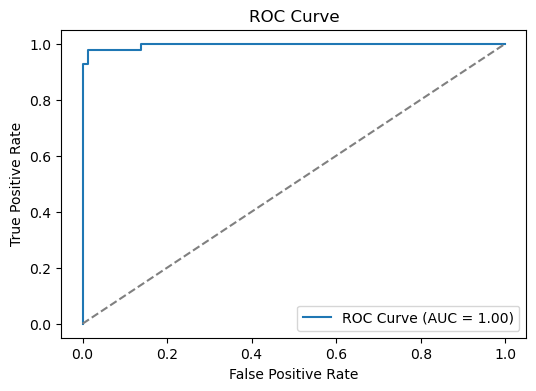

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [32]:
threshold = 0.3
y_pred_new = (y_pred_proba >= threshold).astype(int)
cm_new = confusion_matrix(y_test, y_pred_new)
print(f"\nConfusion Matrix with threshold = {threshold}:\n", cm_new)
print("Precision (new):", precision_score(y_test, y_pred_new))
print("Recall (new):", recall_score(y_test, y_pred_new))


Confusion Matrix with threshold = 0.3:
 [[71  1]
 [ 1 41]]
Precision (new): 0.9761904761904762
Recall (new): 0.9761904761904762


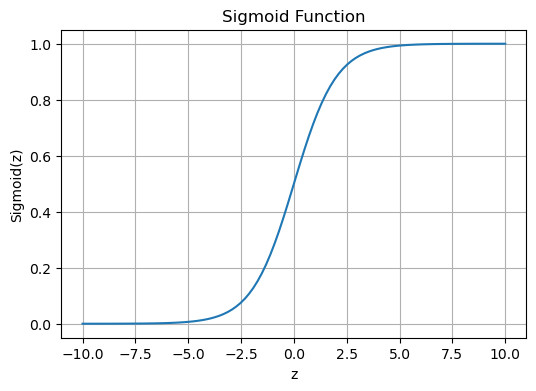


Sigmoid Function Explanation:
The sigmoid function maps any real number to a value between 0 and 1.
In Logistic Regression, it converts the linear output into a probability.
If probability >= threshold, predict class 1; else class 0.


In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

plt.figure(figsize=(6, 4))
plt.plot(z_values, sigmoid_values)
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid(True)
plt.show()

print("\nSigmoid Function Explanation:")
print("The sigmoid function maps any real number to a value between 0 and 1.")
print("In Logistic Regression, it converts the linear output into a probability.")
print("If probability >= threshold, predict class 1; else class 0.")